In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import datetime
import calendar

In [2]:
data1=pd.read_csv('Uber Request Data.csv')
data1

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47
...,...,...,...,...,...,...
6740,6745,City,NaN,No Cars Available,15-07-2016 23:49:03,NaN
6741,6752,Airport,NaN,No Cars Available,15-07-2016 23:50:05,NaN
6742,6751,City,NaN,No Cars Available,15-07-2016 23:52:06,NaN
6743,6754,City,NaN,No Cars Available,15-07-2016 23:54:39,NaN


## Checking the datatypes of all columns

In [3]:
data1.dtypes

Request id             int64
Pickup point          object
Driver id            float64
Status                object
Request timestamp     object
Drop timestamp        object
dtype: object

### Checking for missing values

In [4]:
data1.isnull()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
6740,False,False,True,False,False,True
6741,False,False,True,False,False,True
6742,False,False,True,False,False,True
6743,False,False,True,False,False,True


In [5]:
data1.isnull().any()

Request id           False
Pickup point         False
Driver id             True
Status               False
Request timestamp    False
Drop timestamp        True
dtype: bool

In [6]:
data1.count()

Request id           6745
Pickup point         6745
Driver id            4095
Status               6745
Request timestamp    6745
Drop timestamp       2831
dtype: int64

## Checking the total missing values in the dataset

In [7]:
data1.isnull().sum()

Request id              0
Pickup point            0
Driver id            2650
Status                  0
Request timestamp       0
Drop timestamp       3914
dtype: int64

In [8]:
data1.isnull().values.sum()          # this gives us the value sum of all missing values

6564

### Observation
- From above we observe that there are total 6564 null values present in our data. 
- Driver id and Request timestamp has lots of missing values

In [9]:
data1

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47
...,...,...,...,...,...,...
6740,6745,City,NaN,No Cars Available,15-07-2016 23:49:03,NaN
6741,6752,Airport,NaN,No Cars Available,15-07-2016 23:50:05,NaN
6742,6751,City,NaN,No Cars Available,15-07-2016 23:52:06,NaN
6743,6754,City,NaN,No Cars Available,15-07-2016 23:54:39,NaN


## Now we will change the datatype of timestamp from object to datetime

In [10]:
data1['Request timestamp'] = pd.to_datetime(data1['Request timestamp'])
data1['Drop timestamp'] = pd.to_datetime(data1['Drop timestamp'])

In [11]:
data1.dtypes

Request id                    int64
Pickup point                 object
Driver id                   float64
Status                       object
Request timestamp    datetime64[ns]
Drop timestamp       datetime64[ns]
dtype: object

## Now we have add the coloumn naming hour,day,month,weekday,dayofweek

In [12]:
data1['Request timestamp']=pd.to_datetime(data1['Request timestamp'],format='%m/%d/%Y %H:%M')
data1['Drop timestamp']=pd.to_datetime(data1['Drop timestamp'],format='%m/%d/%Y %H:%M')
                                             

In [13]:
data1['HOUR']=[x.hour for x in data1['Request timestamp']]
data1['DAY']=[x.day for x in data1['Request timestamp']]
data1['MONTH']=[x.month for x in data1['Request timestamp']]
data1['WEEKDAY']=[calendar.day_name[x.dayofweek] for x in data1['Request timestamp']]
data1['DAY_OF_WEEK']=[x.dayofweek for x in data1['Request timestamp']]

In [14]:
data1.head(20)

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,HOUR,DAY,MONTH,WEEKDAY,DAY_OF_WEEK
0,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00,11,7,11,Monday,0
1,867,Airport,1.0,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00,17,7,11,Monday,0
2,1807,City,1.0,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00,9,7,12,Wednesday,2
3,2532,Airport,1.0,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00,21,7,12,Wednesday,2
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,8,13,7,Wednesday,2
5,3879,Airport,1.0,Trip Completed,2016-07-13 21:57:28,2016-07-13 22:28:59,21,13,7,Wednesday,2
6,4270,Airport,1.0,Trip Completed,2016-07-14 06:15:32,2016-07-14 07:13:15,6,14,7,Thursday,3
7,5510,Airport,1.0,Trip Completed,2016-07-15 05:11:52,2016-07-15 06:07:52,5,15,7,Friday,4
8,6248,City,1.0,Trip Completed,2016-07-15 17:57:27,2016-07-15 18:50:51,17,15,7,Friday,4
9,267,City,2.0,Trip Completed,2016-11-07 06:46:00,2016-11-07 07:25:00,6,7,11,Monday,0


# Univariate Analysis

## Categorical 
- barplot 
- pie

In [15]:
data1['WEEKDAY'].value_counts()

Wednesday    2644
Friday       1381
Monday       1367
Thursday     1353
Name: WEEKDAY, dtype: int64

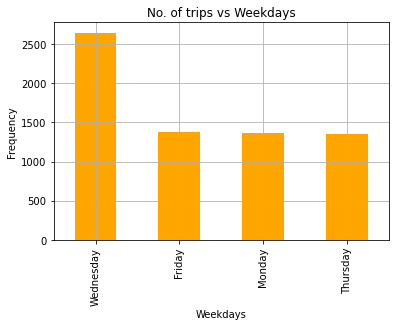

In [16]:
data1['WEEKDAY'].value_counts().plot(kind='bar',color='orange')
plt.xlabel('Weekdays')
plt.ylabel('Frequency')
plt.title('No. of trips vs Weekdays')
plt.grid()
plt.show()

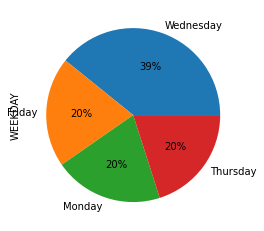

In [17]:
data1['WEEKDAY'].value_counts().plot(kind='pie',autopct='%i%%')
plt.show()

In [18]:
data1['Pickup point'].value_counts()

City       3507
Airport    3238
Name: Pickup point, dtype: int64

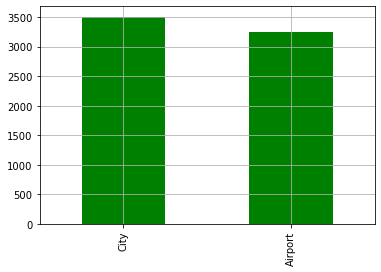

In [19]:
data1['Pickup point'].value_counts().plot(kind='bar',color='green')
plt.grid()
plt.show()

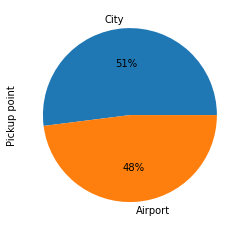

In [20]:
data1['Pickup point'].value_counts().plot(kind='pie',autopct='%i%%')
plt.grid()
plt.show()

In [21]:
data1['Status'].value_counts()

Trip Completed       2831
No Cars Available    2650
Cancelled            1264
Name: Status, dtype: int64

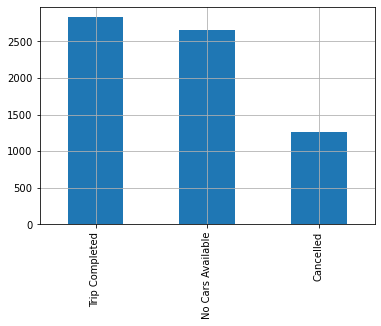

In [22]:
data1['Status'].value_counts().plot(kind='bar')
plt.grid()
plt.show()

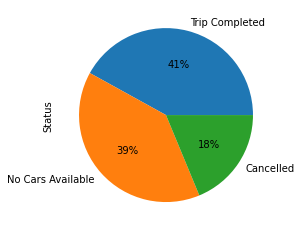

In [23]:
data1['Status'].value_counts().plot(kind='pie',autopct='%i%%')
plt.grid()
plt.show()

## Numerical
- kde 
- boxplot
- boxenplot
- violin plot
- distplot
- histplot

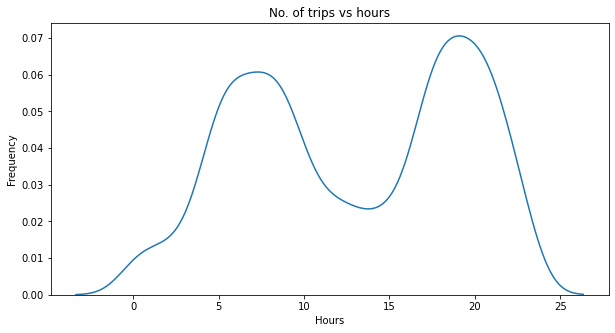

In [24]:
plt.figure(figsize=(10,5))
sns.kdeplot(data=data1,x='HOUR')
plt.xlabel('Hours')
plt.ylabel('Frequency')
plt.title('No. of trips vs hours')
plt.show()

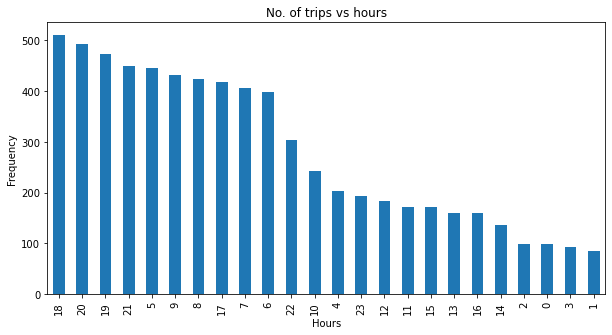

In [25]:
plt.figure(figsize=(10,5))
data1['HOUR'].value_counts().plot(kind='bar')
plt.xlabel('Hours')
plt.ylabel('Frequency')
plt.title('No. of trips vs hours')
plt.show()

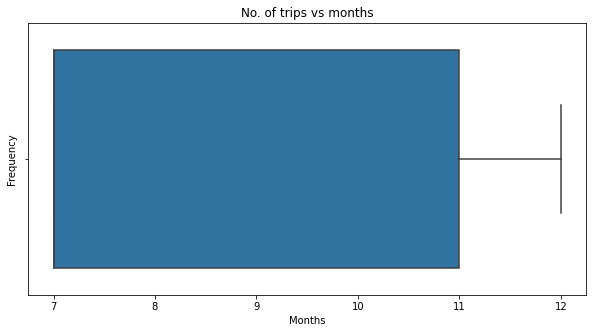

In [26]:
plt.figure(figsize=(10,5))
sns.boxplot(data=data1,x='MONTH')
plt.xlabel('Months')
plt.ylabel('Frequency')
plt.title('No. of trips vs months')
plt.show()

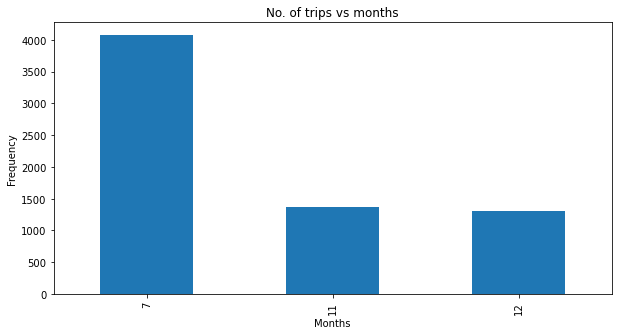

In [27]:
plt.figure(figsize=(10,5))
data1['MONTH'].value_counts().plot(kind='bar')
plt.xlabel('Months')
plt.ylabel('Frequency')
plt.title('No. of trips vs months')
plt.show()

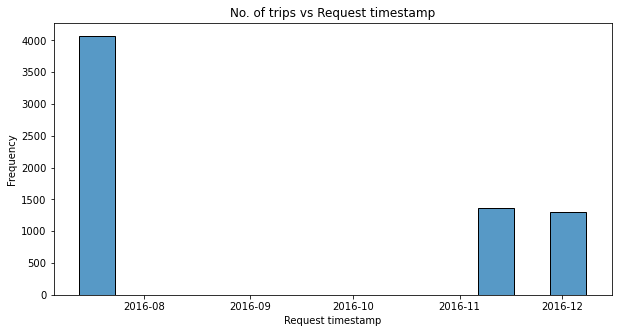

In [28]:
plt.figure(figsize=(10,5))
sns.histplot(data=data1,x='Request timestamp')
plt.xlabel('Request timestamp')
plt.ylabel('Frequency')
plt.title('No. of trips vs Request timestamp')
plt.show()

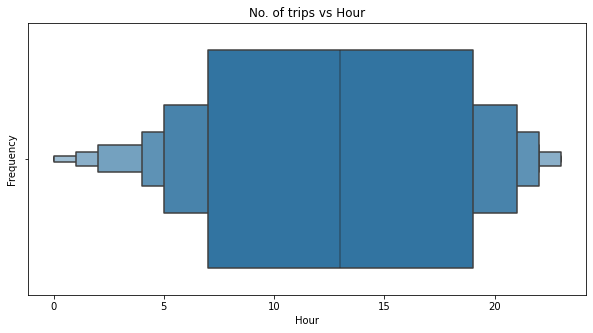

In [29]:
plt.figure(figsize=(10,5))
sns.boxenplot(data=data1,x='HOUR')
plt.xlabel('Hour')
plt.ylabel('Frequency')
plt.title('No. of trips vs Hour')
plt.show()

<Figure size 720x360 with 0 Axes>

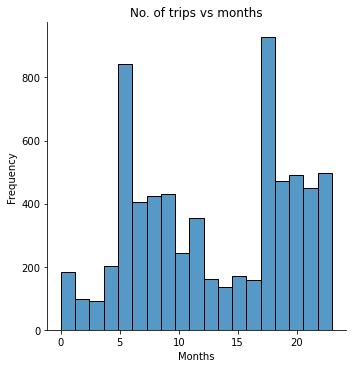

In [30]:
plt.figure(figsize=(10,5))
sns.displot(data=data1,x='HOUR')
plt.xlabel('Months')
plt.ylabel('Frequency')
plt.title('No. of trips vs months')
plt.show()

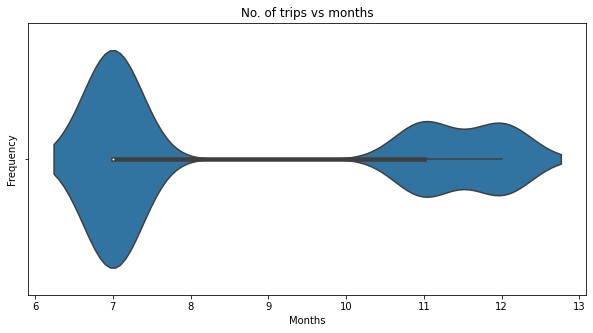

In [31]:
plt.figure(figsize=(10,5))
sns.violinplot(data=data1,x='MONTH')
plt.xlabel('Months')               
plt.ylabel('Frequency')
plt.title('No. of trips vs months')
plt.show()

# Bivariate Analysis

<AxesSubplot:xlabel='Request timestamp', ylabel='HOUR'>

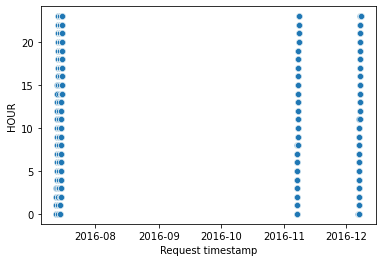

In [32]:
sns.scatterplot(data=data1,x='Request timestamp',y='HOUR')

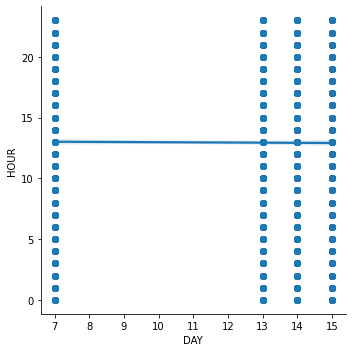

In [33]:
sns.lmplot(data=data1,x='DAY',y='HOUR')

In [34]:
data1.corr()

,Request id,Driver id,HOUR,DAY,MONTH,DAY_OF_WEEK
Request id,1.000000,-0.011499,0.189972,0.913761,-0.808313,0.941671
Driver id,-0.011499,1.000000,-0.006737,-0.012508,0.012744,-0.011907
HOUR,0.189972,-0.006737,1.000000,-0.006833,0.009431,0.000320
DAY,0.913761,-0.012508,-0.006833,1.000000,-0.973350,0.817695
MONTH,-0.808313,0.012744,0.009431,-0.973350,1.000000,-0.669416
DAY_OF_WEEK,0.941671,-0.011907,0.000320,0.817695,-0.669416,1.000000


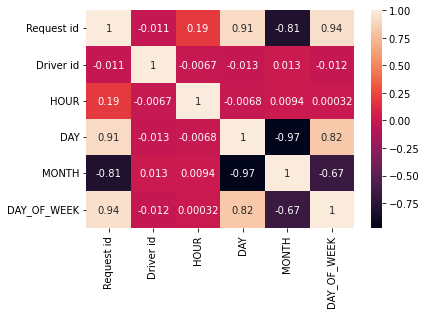

In [35]:
sns.heatmap(data1.corr(),annot=True)
plt.show()

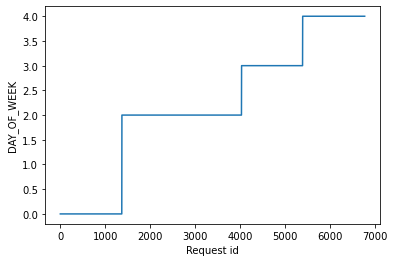

In [36]:
sns.lineplot(data=data1,x='Request id',y='DAY_OF_WEEK')
plt.show()

## Here we have plotted some graphs by countplot()

In [37]:
req_hour=data1["Request timestamp"].dt.hour

In [38]:
data1["req_hour"]=req_hour

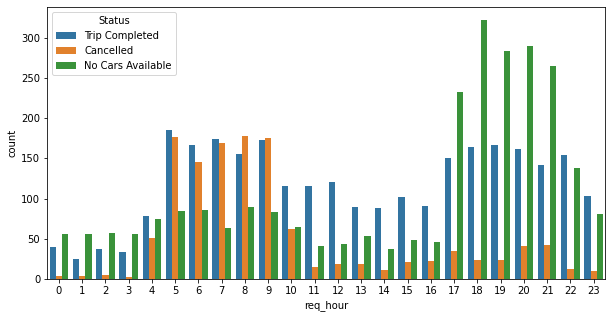

In [39]:
plt.figure(figsize=(10,5))
sns.countplot(x="req_hour",data=data1,hue="Status")
plt.show()

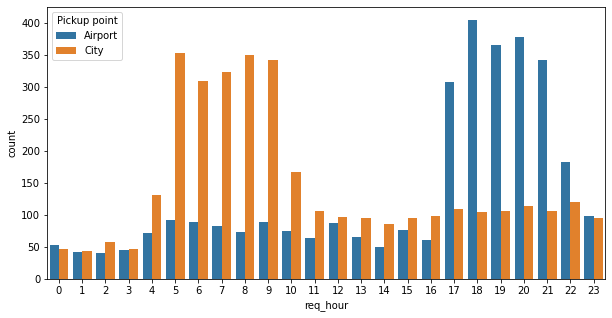

In [40]:
plt.figure(figsize=(10,5))
sns.countplot(x="req_hour",data=data1,hue="Pickup point")
plt.show()

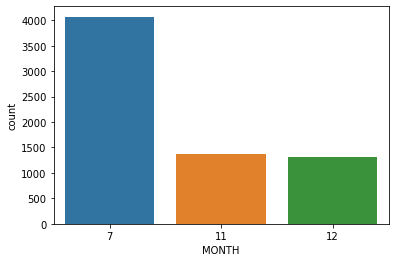

In [41]:
sns.countplot(data=data1,x='MONTH')
plt.show()

<AxesSubplot:xlabel='DAY', ylabel='count'>

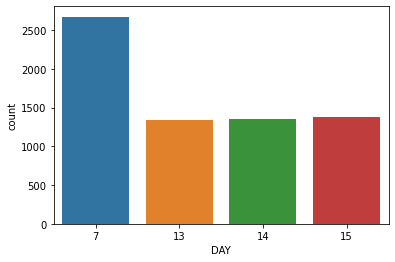

In [42]:
sns.countplot(data=data1,x='DAY')

<AxesSubplot:xlabel='WEEKDAY', ylabel='count'>

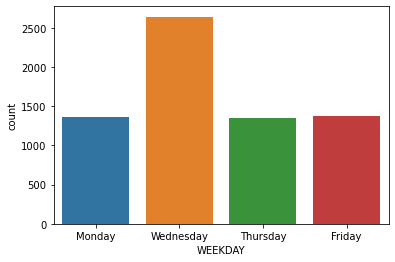

In [43]:
sns.countplot(data=data1,x='WEEKDAY')

# Now we will use some groupby() function

<AxesSubplot:xlabel='WEEKDAY'>

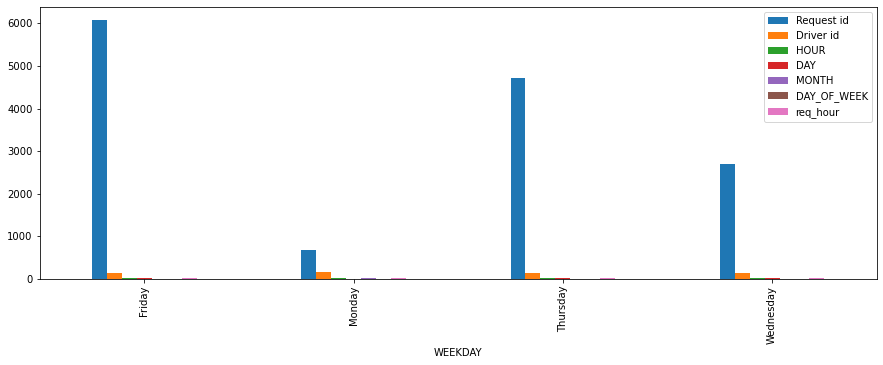

In [44]:
data1.groupby('WEEKDAY').mean().plot(kind='bar',figsize=(15,5))

<AxesSubplot:xlabel='Pickup point'>

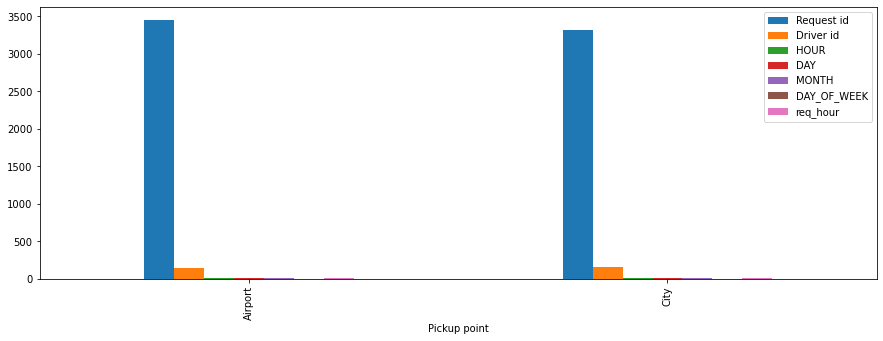

In [45]:
data1.groupby('Pickup point').mean().plot(kind='bar',figsize=(15,5))